In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="darkgrid")

import plotly.express as px

%matplotlib inline

In [2]:
df = pd.read_excel("COPD Sample_Alexandru (1).xlsx")

In [3]:
df.head()

,death,elective,agegroup,quintiles,sex,charlson,ec,pc,month,admisource,year,diagnosis
0,0,0,16,1,0,0,5,0,7,1,4,3
1,0,0,16,3,0,0,2,0,7,3,3,3
2,0,0,14,4,1,0,2,0,12,1,4,3
3,0,0,17,1,1,0,0,0,6,1,4,3
4,0,0,13,5,0,3,0,0,5,1,5,3


In [4]:
df.shape

(100000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   death       100000 non-null  int64
 1   elective    100000 non-null  int64
 2   agegroup    100000 non-null  int64
 3   quintiles   100000 non-null  int64
 4   sex         100000 non-null  int64
 5   charlson    100000 non-null  int64
 6   ec          100000 non-null  int64
 7   pc          100000 non-null  int64
 8   month       100000 non-null  int64
 9   admisource  100000 non-null  int64
 10  year        100000 non-null  int64
 11  diagnosis   100000 non-null  int64
dtypes: int64(12)
memory usage: 9.2 MB


**Dataset looks to be in correct dtypes for moddeling**

In [6]:
df.isna().sum()

death         0
elective      0
agegroup      0
quintiles     0
sex           0
charlson      0
ec            0
pc            0
month         0
admisource    0
year          0
diagnosis     0
dtype: int64

**no missing data in the dataframe**

#### Check for duplicate data

In [7]:
sum(df.duplicated())

46007

**alot of data is duplicated so dropping duplicates would improve model perfomance**

In [8]:
## dropping duplicates
df.drop_duplicates(inplace=True)
df.shape

(53993, 12)

In [9]:
df.describe()

,death,elective,agegroup,quintiles,sex,charlson,ec,pc,month,admisource,year,diagnosis
count,53993.000000,53993.000000,53993.000000,53993.000000,53993.000000,53993.000000,53993.000000,53993.000000,53993.000000,53993.000000,53993.000000,53993.000000
mean,0.068657,0.100402,14.823533,3.167855,0.533421,1.888986,2.541941,0.020021,6.851036,1.279684,4.126572,2.924490
std,0.252872,0.300538,2.628899,1.387211,0.498886,2.876735,3.792298,0.140074,3.534504,0.776916,1.233567,0.265752
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,4.000000,3.000000
50%,0.000000,0.000000,15.000000,3.000000,1.000000,0.000000,1.000000,0.000000,7.000000,1.000000,4.000000,3.000000
75%,0.000000,0.000000,17.000000,4.000000,1.000000,3.000000,3.000000,0.000000,10.000000,1.000000,5.000000,3.000000
max,1.000000,1.000000,21.000000,5.000000,1.000000,34.000000,59.000000,1.000000,12.000000,8.000000,6.000000,3.000000


### Explanaroty analysis
#### Target variable(death)

In [10]:
df.death.value_counts()

0    50286
1     3707
Name: death, dtype: int64

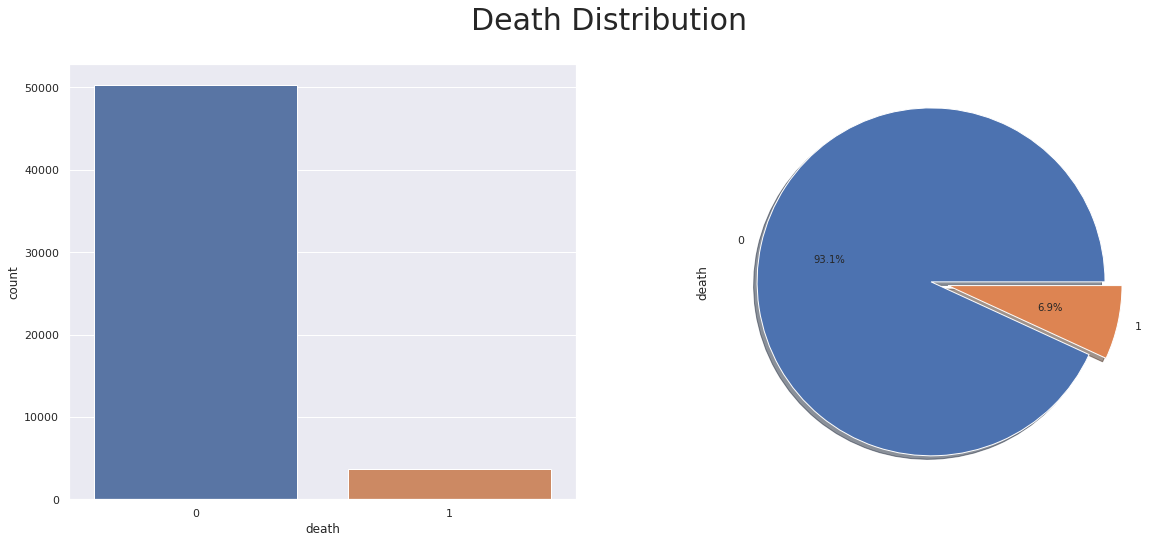

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
fig.suptitle('Death Distribution', fontsize=30)

#count plot
sns.countplot(x='death', data=df, ax=ax[0]);

## Pie chart
df['death'].value_counts().plot.\
    pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True);

**Only 4.1% of all patients died at the end of their stay** 
**Target variable is quite imbalance, there would be overfitting on the high proportion class**

#### Elective variable

In [12]:
df.elective.value_counts(normalize=True)

0    0.899598
1    0.100402
Name: elective, dtype: float64

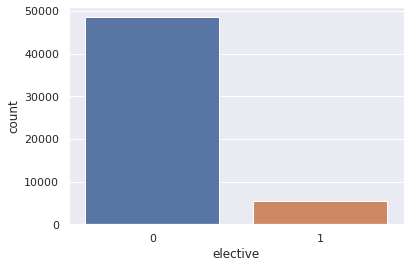

In [13]:
sns.countplot(x='elective', data=df);

**Only 0.07 proportion of the admission method were emergency admissions**

## age group

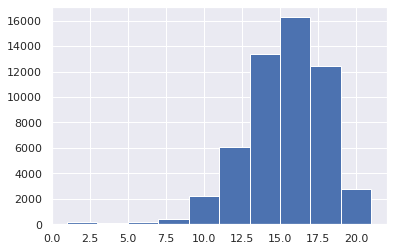

In [14]:
df.agegroup.hist()

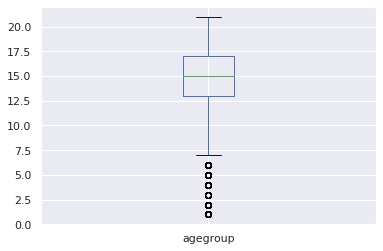

In [15]:
df.agegroup.plot(kind='box')

**agegroup appears to have a slightly right skewed distribution, there is no much outliers of agegroups**

#### quintiles

In [16]:
df.quintiles.value_counts()

5    12420
3    11479
4    11433
2    10112
1     8549
Name: quintiles, dtype: int64

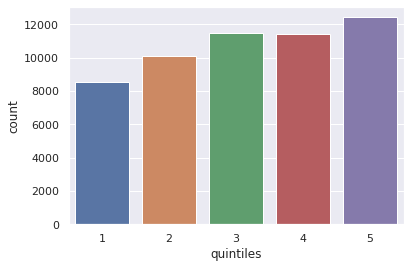

In [17]:
sns.countplot(x = 'quintiles', data=df)

**This show that most people are more deprived, while few people are less deprived. Most people are lacking basic needs.**

### SEX

In [18]:
df.sex.value_counts(normalize=True)

1    0.533421
0    0.466579
Name: sex, dtype: float64

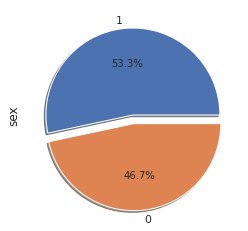

In [19]:
## Pie chart
df['sex'].value_counts().plot.pie(explode=[0,0.1],\
                                  autopct='%1.1f%%' ,shadow=True);

**Male were 51.7% of the total patients.** <br/>
**Female -> 48.3%**

## Charlson score(Comorbidity)

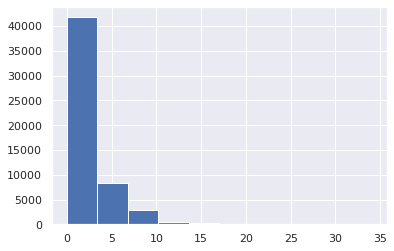

In [20]:
df.charlson.hist()

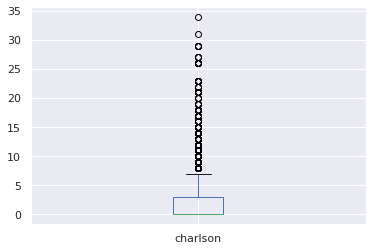

In [21]:
df.charlson.plot(kind='box')

## Source of admission

In [22]:
df.admisource.value_counts()

1    46735
3     5411
2     1105
5      611
7       87
4       25
8       19
Name: admisource, dtype: int64

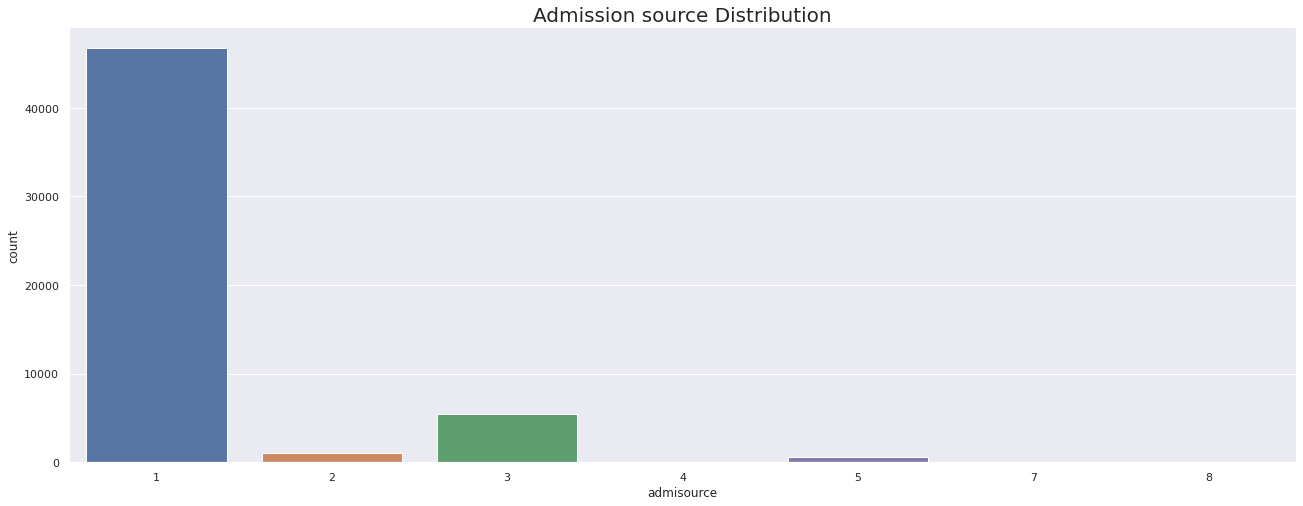

In [23]:
plt.figure(figsize=(22, 8))
sns.countplot(x = 'admisource', data=df)
plt.title('Admission source Distribution', fontsize=20)
plt.show()

### year

In [24]:
df.year.value_counts()

5    23985
4    15017
2     5617
3     4265
6     2735
1     2374
Name: year, dtype: int64

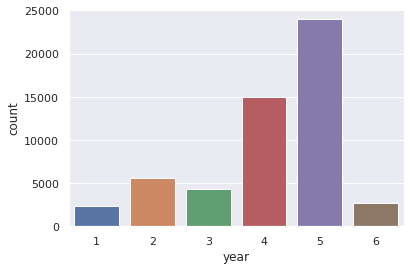

In [25]:
sns.countplot(x = 'year', data=df);

**2012 had the highest number of patients follwed by the year 2011, but 2013 had a drop in number of patients**

### Palliative care

In [26]:
df.pc.value_counts(normalize=True)

0    0.979979
1    0.020021
Name: pc, dtype: float64

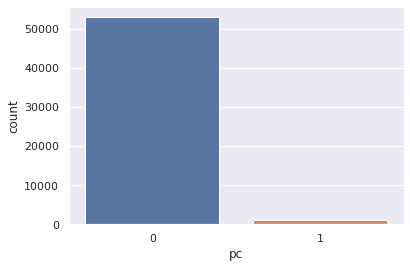

In [27]:
sns.countplot(x = 'pc', data=df);

**Very less patients were under palliative care almost, 0.01 distribution of the patients**

## Emergency admissions

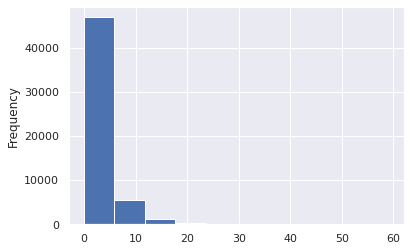

In [28]:
df.ec.plot.hist();

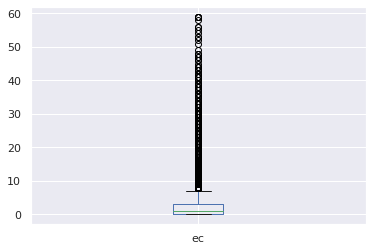

In [29]:
df.ec.plot(kind='box');

**ec column has alot of outliers as shown by it boxplot**

## Diagnosis subgroup

In [30]:
df.diagnosis.value_counts()

3    49938
2     4033
1       22
Name: diagnosis, dtype: int64

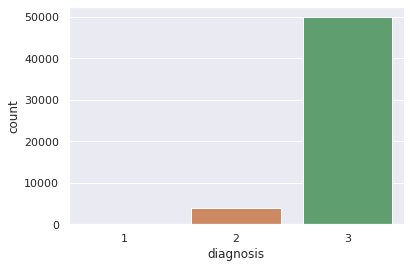

In [31]:
sns.countplot(x= 'diagnosis', data=df);

**Patients of subcategory 3 were the one who seems to be admitted mostly**

### Month

In [32]:
df.month.value_counts()

12    6197
1     5188
8     4904
11    4875
10    4740
5     4542
7     4448
9     4205
6     4194
4     4181
3     3482
2     3037
Name: month, dtype: int64

/home/spkibe/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


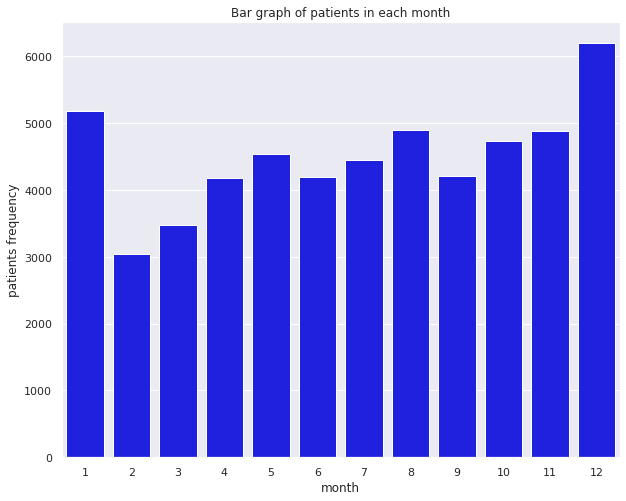

In [33]:
month_count  = df['month'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(month_count.index, month_count.values, color='blue')
plt.title('Bar graph of patients in each month')
plt.ylabel('patients frequency')
plt.xlabel('month')
plt.show()

**December is the month were most patients are admitted followed by January**

## Multivariate analysis

### sex vs death

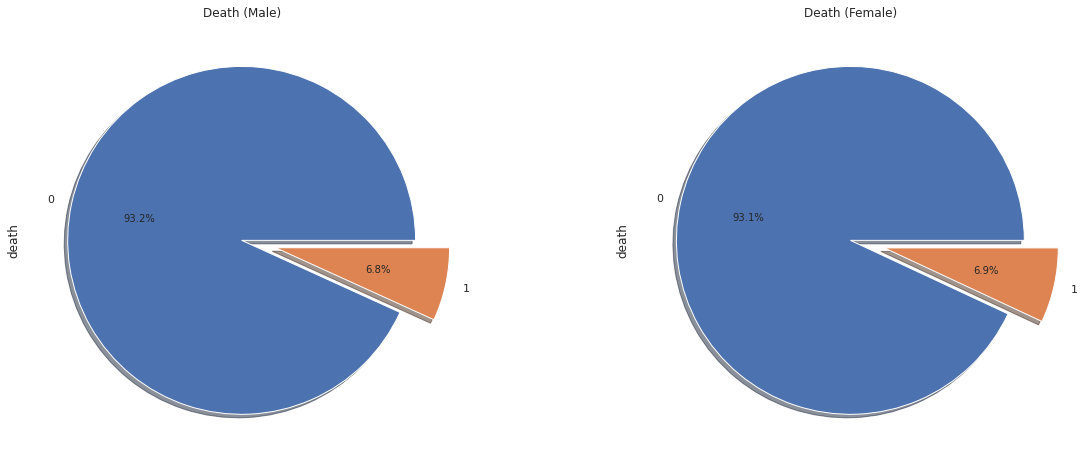

In [34]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
df['death'][df['sex']==1].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['death'][df['sex']==0].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Death (Male)')
ax[1].set_title('Death (Female)')

plt.show()

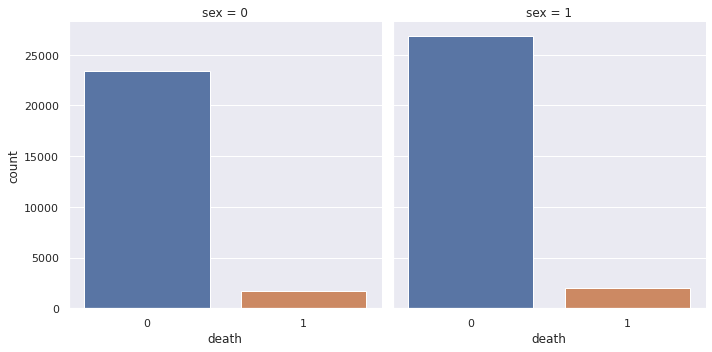

In [35]:
sns.catplot(x='death', col='sex', kind='count', data=df);

### Elective vs death

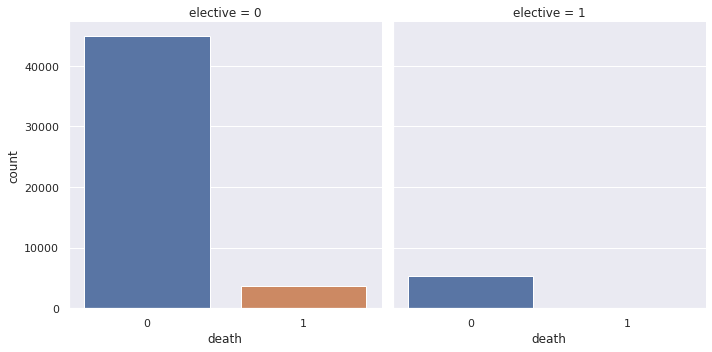

In [36]:
## elective vs death
sns.catplot(x='death', col='elective', kind='count', data=df);

### quintiles vs death

<Figure size 1584x576 with 0 Axes>

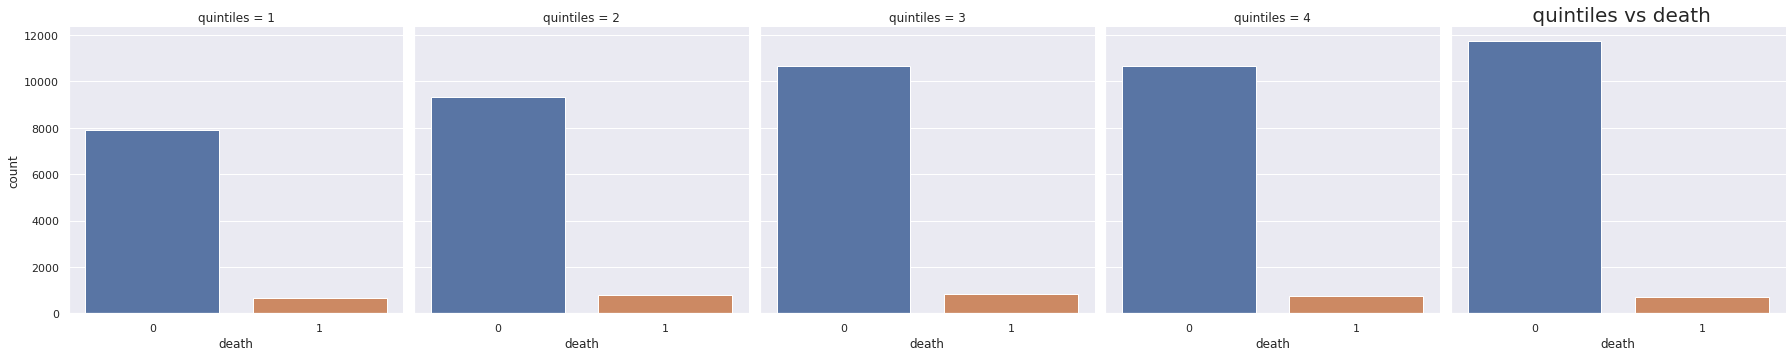

In [37]:
## quintiles vs death
plt.figure(figsize=(22, 8))
sns.catplot(x='death', col='quintiles', kind='count', data=df);
plt.title(" quintiles vs death", fontsize=20)
plt.show()

### agegroup vs death

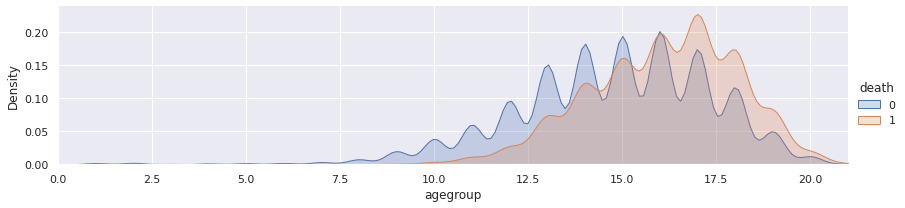

In [38]:
# plot distributions of age of patinets who died or survived
age = sns.FacetGrid( df, hue = 'death', aspect=4 )
age.map(sns.kdeplot, 'agegroup', shade= True )
age.set(xlim=(0 , df['agegroup'].max()))
age.add_legend();

### Charlson vs death

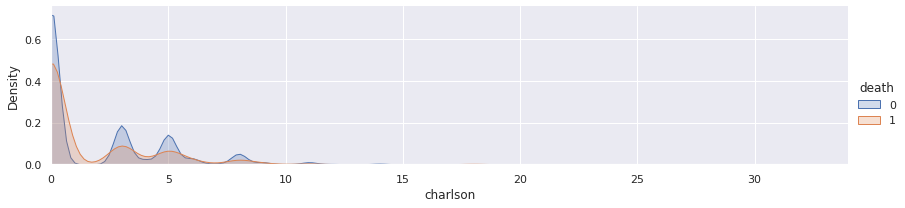

In [39]:
# plot distributions of charlson of patinets who died or survived
age = sns.FacetGrid( df, hue = 'death', aspect=4 )
age.map(sns.kdeplot, 'charlson', shade= True )
age.set(xlim=(0 , df['charlson'].max()))
age.add_legend();

### admin source vs death

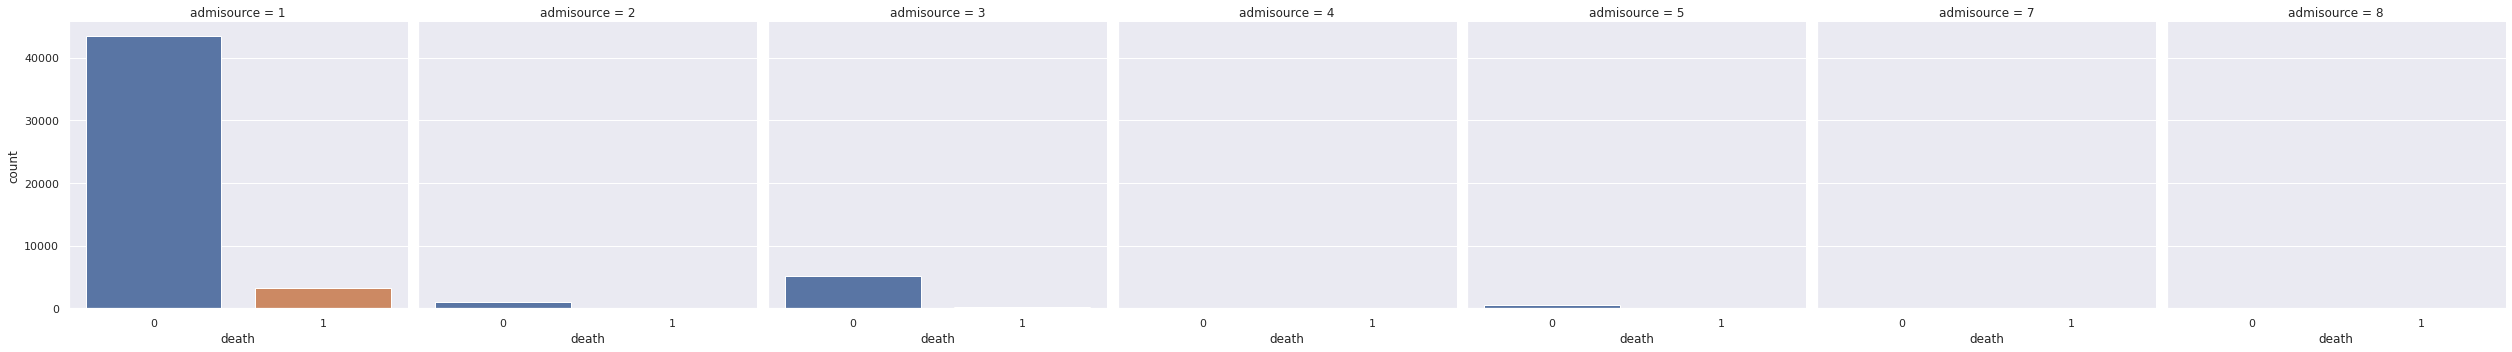

In [40]:
sns.catplot(x='death', col='admisource', kind='count', data=df);

### diagnosis vs death

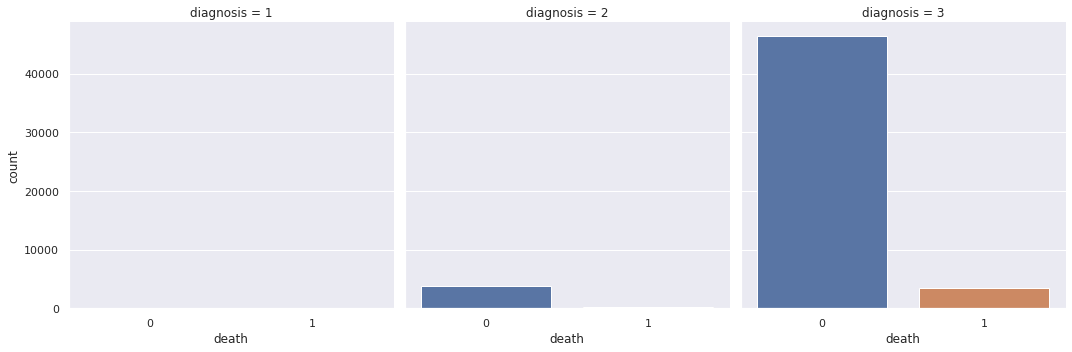

In [41]:
sns.catplot(x='death', col='diagnosis', kind='count', data=df);

### months vs death

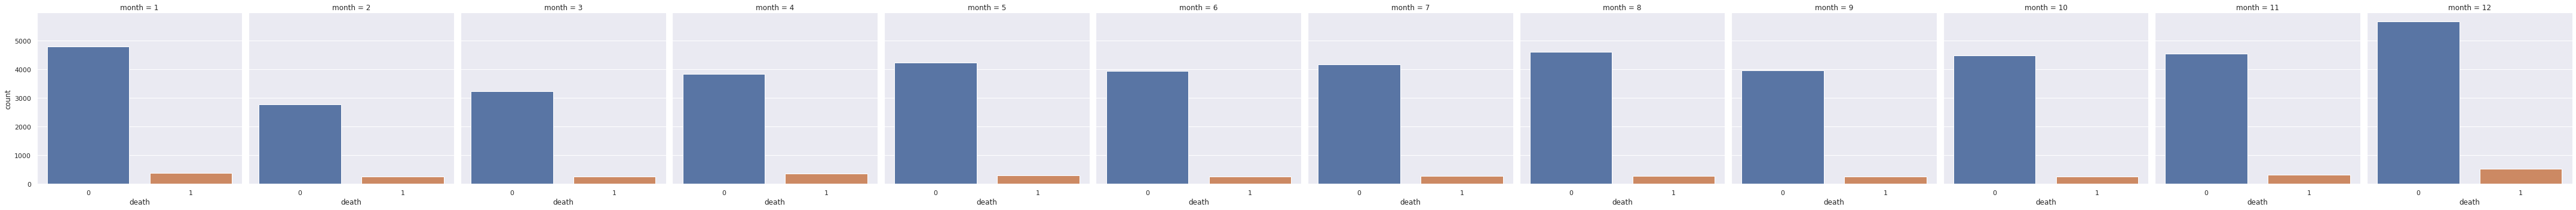

In [42]:
sns.catplot(x='death', col='month', kind='count', data=df);

### ec vs death

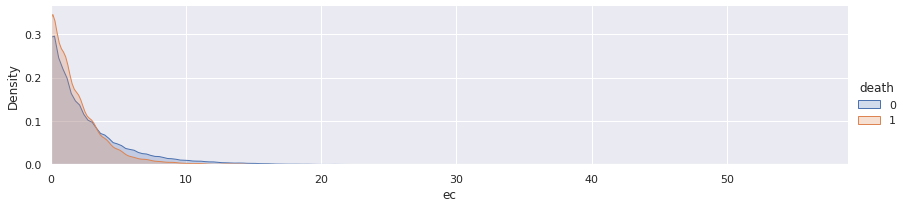

In [43]:
# plot distributions of charlson of patinets who died or survived
age = sns.FacetGrid(df, hue = 'death', aspect=4 )
age.map(sns.kdeplot, 'ec', shade= True )
age.set(xlim=(0 , df['ec'].max()))
age.add_legend();

### correlation

In [44]:
corr_matrix = df.corr()

corr_matrix["death"].sort_values(ascending=False)

death         1.000000
pc            0.143159
agegroup      0.128917
year          0.038819
diagnosis     0.025332
sex          -0.002994
month        -0.009487
admisource   -0.012047
quintiles    -0.030425
charlson     -0.030870
ec           -0.060432
elective     -0.076083
Name: death, dtype: float64

### dropping outliers

In [45]:
cols = ['ec', 'charlson', 'agegroup'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
df.death.value_counts()

0    42757
1     3418
Name: death, dtype: int64

### Modelling

#### Data splitting, spliting features from dependant feature

In [47]:
X = df.drop(['death'], axis=1)
y = df['death']

In [48]:
## splitting test and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Logistic Regression

In [49]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
#logreg.fit(X_train, y_train)

# predict
#logreg_pred = logreg.predict(X_test)

In [50]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


sfs1 = sfs(logreg, k_features=7, forward=True, verbose=2, scoring='accuracy')

In [51]:
# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.1s finished

[2022-05-28 14:03:13] Features: 1/7 -- score: 0.9259637432710788[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished

[2022-05-28 14:03:14] Features: 2/7 -- score: 0.9259637432710788[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s finished

[2022-05-28 14:03:16] Features: 3/7 -- score: 0.9261493916212966[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [52]:
# Which features?
feat_cols = list(sfs1.k_feature_names_)
print(feat_cols)

['elective', 'agegroup', 'sex', 'ec', 'pc', 'month', 'year']


In [53]:
logreg.fit(X_train.loc[:, feat_cols], y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [54]:
y_test_pred = logreg.predict(X_test.loc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Testing accuracy on selected features: 0.926


In [55]:
confusion_matrix(y_test, y_test_pred)

array([[12817,    11],
       [ 1011,    14]])

**loking @ confusion matrix the model is perfoming poorly**

In [56]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12828
           1       0.56      0.01      0.03      1025

    accuracy                           0.93     13853
   macro avg       0.74      0.51      0.49     13853
weighted avg       0.90      0.93      0.89     13853



**The model is overfitting on 0 class on f1 -score result**

### Backward selection

In [57]:
sfsbackward  = sfs(logreg, k_features=7, forward=False, verbose=1, scoring='accuracy')

sfsbackward = sfsbackward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.9s finished
Features: 10/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.3s finished
Features: 9/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.8s finished
Features: 8/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.9s finished
Features: 7/7

In [58]:
feat_names = list(sfsbackward.k_feature_names_)
print(feat_names)

['elective', 'agegroup', 'sex', 'ec', 'pc', 'month', 'year']


In [59]:
logreg.fit(X_train.loc[:, feat_names], y_train)

backward_pred = logreg.predict(X_test.loc[:, feat_names])

In [60]:
accuracy_score(y_test, backward_pred)

0.9262253663466398

In [61]:
confusion_matrix(y_test, backward_pred)

array([[12817,    11],
       [ 1011,    14]])

In [62]:
print(classification_report(y_test, backward_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12828
           1       0.56      0.01      0.03      1025

    accuracy                           0.93     13853
   macro avg       0.74      0.51      0.49     13853
weighted avg       0.90      0.93      0.89     13853



### Oversampling and Undersampling 

In [63]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)


In [64]:
y_rus.value_counts()

1    2393
0    2393
Name: death, dtype: int64

In [65]:
sfsbackward  = sfs(logreg, k_features=9, forward=False, verbose=1, scoring='accuracy')

sfsbackward = sfsbackward.fit(x_rus, y_rus)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.6s finished
Features: 10/9[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
Features: 9/9

In [66]:
feat_names = list(sfsbackward.k_feature_names_)
print(feat_names)

['elective', 'agegroup', 'sex', 'charlson', 'ec', 'pc', 'month', 'admisource', 'year']


In [67]:
logreg.fit(x_rus.loc[:, feat_names], y_rus)

backward_pred = logreg.predict(X_test.loc[:, feat_names])

In [68]:
accuracy_score(y_test, backward_pred)

0.6584855266007363

In [69]:
confusion_matrix(y_test, backward_pred)

array([[8413, 4415],
       [ 316,  709]])

In [70]:
print(classification_report(y_test, backward_pred))

              precision    recall  f1-score   support

           0       0.96      0.66      0.78     12828
           1       0.14      0.69      0.23      1025

    accuracy                           0.66     13853
   macro avg       0.55      0.67      0.51     13853
weighted avg       0.90      0.66      0.74     13853



In [71]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target 
X_ros, y_ros = ros.fit_resample(X_train, y_train)

### Backward selection on oversampled data

In [72]:
sfsbackward  = sfs(logreg, k_features=9, forward=False, verbose=1, scoring='accuracy')

sfsbackward = sfsbackward.fit(X_ros, X_ros)

/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 576, in _validate_data
    X, y = 

/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 576, in _validate_data
    X, y = 

/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 576, in _validate_data
    X, y = 

/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 576, in _validate_data
    X, y = 

/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 576, in _validate_data
    X, y = 

/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 576, in _validate_data
    X, y = 

/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/home/spkibe/anaconda3/lib/python3.7/site-packages/sklearn/base.py", line 576, in _validate_data
    X, y = 

In [73]:
feat_names = list(sfsbackward.k_feature_names_)
print(feat_names)

['elective', 'agegroup', 'quintiles', 'sex', 'charlson', 'ec', 'pc', 'month', 'admisource']


In [74]:
logreg.fit(X_ros.loc[:, feat_names], y_ros)

backward_pred = logreg.predict(X_test.loc[:, feat_names])

In [75]:
y_test.value_counts()

0    12828
1     1025
Name: death, dtype: int64

In [76]:
accuracy_score(y_test, backward_pred)

0.6472966144517434

In [77]:
confusion_matrix(y_test, backward_pred)

array([[8286, 4542],
       [ 344,  681]])

In [78]:
print(classification_report(y_test, backward_pred))

              precision    recall  f1-score   support

           0       0.96      0.65      0.77     12828
           1       0.13      0.66      0.22      1025

    accuracy                           0.65     13853
   macro avg       0.55      0.66      0.50     13853
weighted avg       0.90      0.65      0.73     13853



### forward-selection on over sampled data

In [79]:
# Perform SFFS
sfs1 = sfs1.fit(X_ros, y_ros)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.5s finished

[2022-05-28 14:03:48] Features: 1/7 -- score: 0.6120317887059893[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished

[2022-05-28 14:03:50] Features: 2/7 -- score: 0.6302582588845194[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.3s finished

[2022-05-28 14:03:53] Features: 3/7 -- score: 0.6433392127086947[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [80]:
# Which features?
feat_cols = list(sfs1.k_feature_names_)
print(feat_cols)

['elective', 'agegroup', 'charlson', 'ec', 'pc', 'year', 'diagnosis']


In [81]:
logreg.fit(X_ros.loc[:, feat_cols], y_ros)

LogisticRegression(random_state=0, solver='liblinear')

In [82]:
y_test_pred = logreg.predict(X_test.loc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Testing accuracy on selected features: 0.662


In [83]:
confusion_matrix(y_test_pred, y_test)

array([[8472,  321],
       [4356,  704]])

In [84]:
print(classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78      8793
           1       0.69      0.14      0.23      5060

    accuracy                           0.66     13853
   macro avg       0.67      0.55      0.51     13853
weighted avg       0.67      0.66      0.58     13853

